In [102]:
#import necessary libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [103]:

#read Datasets
train_data_path = "../input/summeranalytics2020/train.csv"
test_data_path = "../input/summeranalytics2020/test.csv"
sample_data_path = "../input/summeranalytics2020/Sample_submission.csv"

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

In [104]:
#Lookup basic summary statistics
# There are no empty values that needs handling
train.isnull().sum()

Id                         0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

In [105]:
test.isnull().sum()

Id                         0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

In [106]:
len(train.columns)

29

In [107]:
train.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [108]:
train.describe()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,...,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0
mean,814.500000,35.645577,0.482187,9.735258,2.884521,1000.985872,2.646192,2.650491,2.639435,5785.524570,...,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0
std,470.107435,9.481794,0.499836,8.306546,1.020470,585.417694,1.125283,0.736330,1.096272,4339.293147,...,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0
min,1.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,407.750000,29.000000,0.000000,2.000000,2.000000,509.250000,2.000000,2.000000,2.000000,2625.000000,...,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0
50%,814.500000,34.000000,0.000000,8.000000,3.000000,977.000000,3.000000,3.000000,3.000000,4304.000000,...,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0
75%,1221.250000,42.000000,1.000000,15.000000,4.000000,1494.000000,4.000000,3.000000,4.000000,7124.250000,...,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,1628.000000,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,...,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


In [109]:
# The Columns ID, EmployeeNumber are redundant, Behaviour column has only one category, hence the above columns can be neglected
train  = train.drop(labels=['Id','EmployeeNumber','Behaviour'],axis='columns')


In [110]:
test  = test.drop(labels=['Id','EmployeeNumber','Behaviour'],axis='columns')

In [111]:
#outliers Analysis by Boxplot and histogram
def outlierAnalysis(dataset,target_col):
  f1 = plt.figure(1)
  sns.boxplot(x= target_col,data=dataset,)
  # n_bins = int(np.sqrt(len(dataset)))
  f2 = plt.figure(2)
  sns.distplot(dataset[target_col],kde=False)
  plt.show()

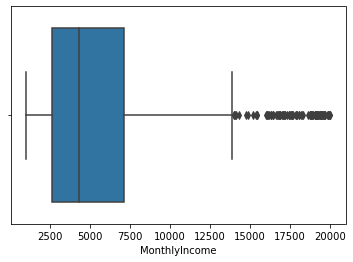

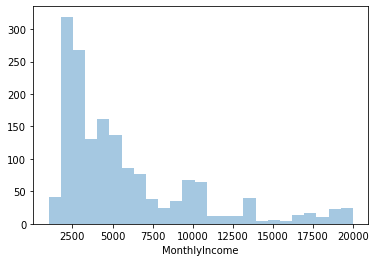

In [112]:
outlierAnalysis(train,'MonthlyIncome')

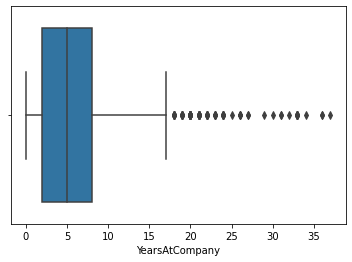

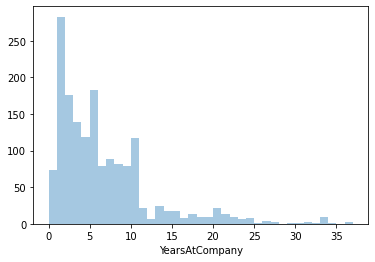

In [113]:
outlierAnalysis(train,'YearsAtCompany')

In [114]:
#To convert Low ordinal columns using Label Encoding
train['MaritalStatus'].value_counts()

Married     681
Single      630
Divorced    317
Name: MaritalStatus, dtype: int64

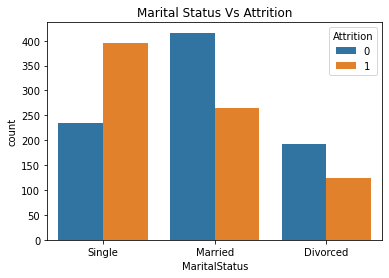

In [115]:
sns.countplot(data=train, x='MaritalStatus', hue='Attrition');
plt.title('Marital Status Vs Attrition');

In [116]:
#Label Encode Gender, MaritalStatus, Overtime
train['Gender'] = train['Gender'].map({'Male': 1, 'Female': 0})
train['MaritalStatus'] = train['MaritalStatus'].map({'Married': 1, 'Divorced': 0, 'Single':2})
train['OverTime'] = train['OverTime'].map({'Yes': 1, 'No': 0})

In [117]:
test['Gender'] = test['Gender'].map({'Male': 1, 'Female': 0})
test['MaritalStatus'] = test['MaritalStatus'].map({'Married': 1, 'Divorced': 0, 'Single':2})
test['OverTime'] = test['OverTime'].map({'Yes': 1, 'No': 0})

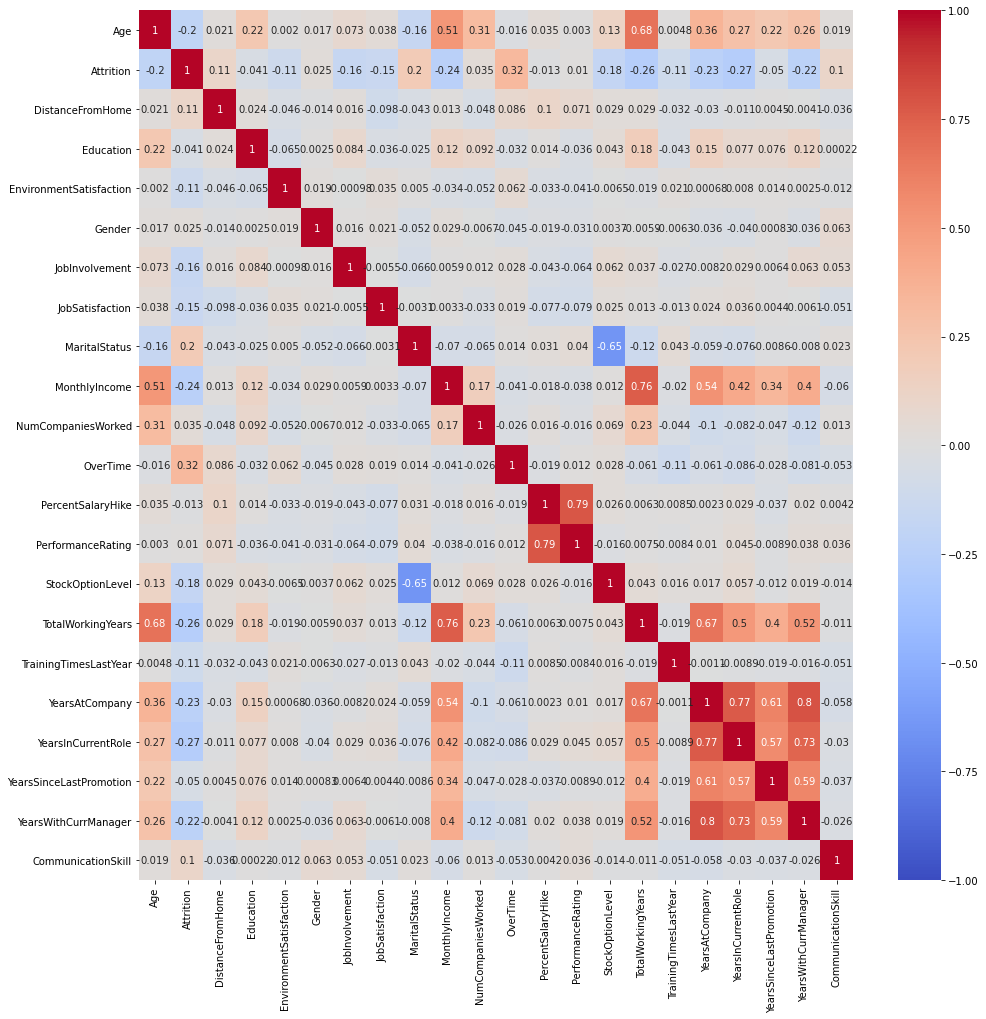

In [118]:
plt.figure(figsize=(16,16))
train_corr = train.corr()
sns.heatmap(train_corr,
            vmin=-1,
            cmap='coolwarm',
            annot=True);

In [119]:
cat_cols = ['BusinessTravel','Department','EducationField','JobRole']
train_onehot = pd.get_dummies(train,columns = cat_cols ,prefix=cat_cols)

In [120]:
cat_cols = ['BusinessTravel','Department','EducationField','JobRole']
test_onehot = pd.get_dummies(test,columns = cat_cols ,prefix=cat_cols)

In [121]:
test_onehot.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'Gender', 'JobInvolvement', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manu

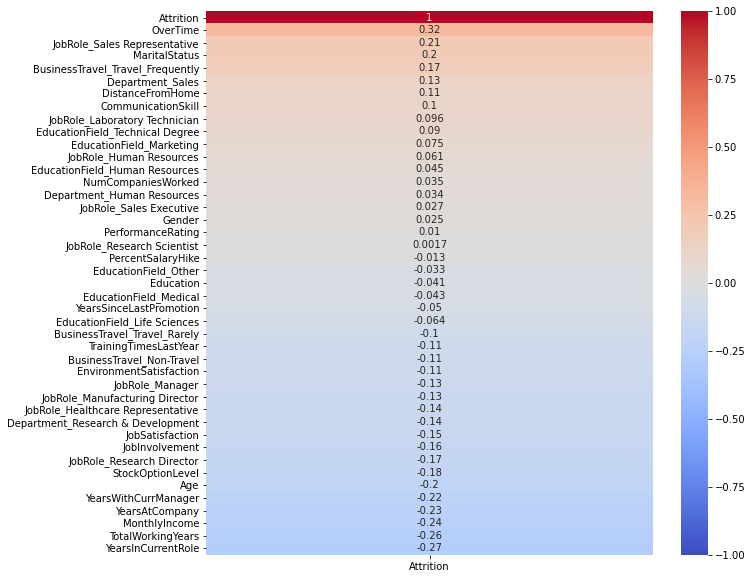

In [122]:
train_onehot_corr = train_onehot.corr()
plt.figure(figsize=(10,10))
sns.heatmap(train_onehot_corr[['Attrition']].sort_values(by=['Attrition'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

In [123]:
#Categorical vs Numerical Bivariate Exploration
def barplot(data,target_col):
  ordering = data.groupby('Attrition')[target_col].mean().sort_values(ascending=False).index
  sns.barplot(data=data, x='Attrition', y=target_col,
            order = ordering)
  plt.title('Barplot C vs N');

In [124]:
train.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'CommunicationSkill'],
      dtype='object')

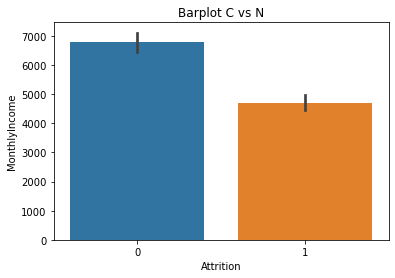

In [125]:
#People with considerable Low Pay resign their jobs
barplot(train,'MonthlyIncome')

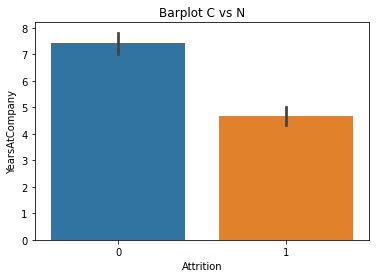

In [126]:
#people who worked for larger number of years tend to stay in the field
barplot(train,'YearsAtCompany')

In [127]:
len(train_onehot.columns)

43

In [128]:
for col in train_onehot.columns:
  train_onehot[col] = train_onehot[col].astype('int64')

In [129]:
for col in test_onehot.columns:
  test_onehot[col] = test_onehot[col].astype('int64')

In [130]:
#Data is almost balanced hence there is no need for extra balancing techniques like Smote etc.
train_onehot['Attrition'].value_counts()

0    843
1    785
Name: Attrition, dtype: int64

In [131]:
y = train_onehot['Attrition']
X = train_onehot.drop(labels='Attrition',axis=1)

In [132]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [133]:
#Modelling
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [134]:
def modelPerformace(model,y_test,y_pred):
  cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=model.classes_,

                      columns=model.classes_)
  cm_df.index.name = 'Predicted'
  cm_df.columns.name = 'True'
  print("Confusion Matrix")
  print(cm_df)
  print("\n")
  print("Classification Score")
  print(classification_report(y_test, y_pred))
  print("Accuracy Score "+str(model.score(X_test,y_test)))
  print("AUC_ROC Score is "+str(roc_auc_score(y_test,y_pred)))

In [135]:
#Lets Start with DecisionTree Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],'min_samples_split': [2, 3, 4]}
Grid_Search_CV_DT = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=5,n_jobs=-1,scoring='roc_auc')

Grid_Search_CV_DT.fit(X_train,y_train)
print("\n")
Grid_Search_CV_DT.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.8s


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    4.7s finished


DecisionTreeClassifier(max_depth=11, random_state=42)

In [136]:
model_DT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
model_DT.fit(X_train,y_train)
y_pred = model_DT.predict(X_test)

In [137]:
modelPerformace(model_DT,y_test,y_pred)

Confusion Matrix
True         0    1
Predicted          
0          170   10
1           20  207


Classification Score
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       190
           1       0.91      0.95      0.93       217

    accuracy                           0.93       407
   macro avg       0.93      0.92      0.93       407
weighted avg       0.93      0.93      0.93       407

Accuracy Score 0.9262899262899262
AUC_ROC Score is 0.9243269463982537


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

params = {'penalty':['l1', 'l2', 'elasticnet'],'C':[0.00075,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,100.0,500.0],}

Grid_Search_CV_LR = GridSearchCV(LogisticRegression(random_state=42,max_iter=10000), params, verbose=1, cv=5,n_jobs=-1,scoring='roc_auc')

Grid_Search_CV_LR.fit(X_train,y_train)
print("\n")
Grid_Search_CV_LR.best_estimator_

In [138]:
model_LR = LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model_LR.fit(X_train,y_train)
y_pred = model_LR.predict(X_test)


In [139]:
modelPerformace(model_LR,y_test,y_pred)

Confusion Matrix
True         0    1
Predicted          
0          156   46
1           34  171


Classification Score
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       190
           1       0.83      0.79      0.81       217

    accuracy                           0.80       407
   macro avg       0.80      0.80      0.80       407
weighted avg       0.81      0.80      0.80       407

Accuracy Score 0.8034398034398035
AUC_ROC Score is 0.8045355323793355


In [ ]:
#lets try Random Forest 
from sklearn.ensemble import RandomForestClassifier

param_grid = { 
    'n_estimators': [200, 500, 700, 900, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,3],
    'criterion' :['gini', 'entropy']
}

rfc=RandomForestClassifier(random_state=42)

Grid_Search_CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,verbose=1, n_jobs=-1)
Grid_Search_CV_rfc.fit(X_train, y_train)

In [ ]:

Grid_Search_CV_rfc.best_params_


In [140]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(random_state=42,criterion = 'gini',max_depth = 8, max_features = 'auto', n_estimators = 200)
model_RF.fit(X_train,y_train)
y_pred = model_RF.predict(X_test)

In [141]:
modelPerformace(model_RF,y_test,y_pred)

Confusion Matrix
True         0    1
Predicted          
0          183    7
1            7  210


Classification Score
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       190
           1       0.97      0.97      0.97       217

    accuracy                           0.97       407
   macro avg       0.97      0.97      0.97       407
weighted avg       0.97      0.97      0.97       407

Accuracy Score 0.9656019656019657
AUC_ROC Score is 0.9654499151103565


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

Grid_Search_CV_XGB = GridSearchCV(estimator=xgb, param_grid=params, cv= 5,verbose=1, n_jobs=-1)
Grid_Search_CV_XGB.fit(X_train,y_train)

In [ ]:
Grid_Search_CV_XGB.best_params_

In [142]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',nthread=1,colsample_bytree = 0.6, gamma = 0.5, max_depth = 5, min_child_weight = 1, subsample = 0.8)
    
model_XGB.fit(X_train,y_train)

y_pred = model_XGB.predict(X_test)

In [143]:
modelPerformace(model_RF,y_test,y_pred)

Confusion Matrix
True         0    1
Predicted          
0          181    0
1            9  217


Classification Score
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       190
           1       0.96      1.00      0.98       217

    accuracy                           0.98       407
   macro avg       0.98      0.98      0.98       407
weighted avg       0.98      0.98      0.98       407

Accuracy Score 0.9656019656019657
AUC_ROC Score is 0.9763157894736841


In [144]:
from sklearn.ensemble import StackingClassifier


estimators = [('dt',model_DT),('rf',model_RF),('xgb',model_XGB)]

model_stack = StackingClassifier(estimators = estimators, cv = 5, n_jobs =-1,verbose = 1)
model_stack.fit(X_train,y_train)
y_pred = model_stack.predict(X_test)

In [145]:
modelPerformace(model_RF,y_test,y_pred)

Confusion Matrix
True         0    1
Predicted          
0          186    4
1            4  213


Classification Score
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       190
           1       0.98      0.98      0.98       217

    accuracy                           0.98       407
   macro avg       0.98      0.98      0.98       407
weighted avg       0.98      0.98      0.98       407

Accuracy Score 0.9656019656019657
AUC_ROC Score is 0.9802570943487753


In [146]:
#Stacking yielded highest results
# model_stack.fit(train_onehot)
target = train_onehot['Attrition']
train_final = train_onehot.drop('Attrition',axis='columns')

In [147]:
model_stack.fit(train_final,target)

StackingClassifier(cv=5,
                   estimators=[('dt',
                                DecisionTreeClassifier(max_depth=10,
                                                       min_samples_split=3,
                                                       random_state=42)),
                               ('rf',
                                RandomForestClassifier(max_depth=8,
                                                       n_estimators=200,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.6, gamma=0.5,
                                              gpu_id=-1, importance_type='gain',
                                              interac

In [148]:
y_pred = model_stack.predict_proba(test_onehot)[:,1]

In [149]:
y_pred

array([1.27086322e-04, 1.55861151e-04, 2.41628522e-04, 1.79593253e-04,
       1.03359789e-04, 8.84703275e-03, 8.17504494e-02, 2.95978521e-04,
       4.04455251e-04, 2.01151139e-04, 1.15562269e-04, 2.62037263e-04,
       1.55140008e-04, 1.29993104e-04, 1.04430011e-04, 2.50895928e-04,
       4.65609251e-02, 2.48837951e-04, 1.62163261e-04, 7.94370153e-05,
       1.20189891e-04, 9.47512404e-01, 2.30532987e-04, 1.44328091e-04,
       7.89039190e-03, 8.92914905e-05, 1.08270705e-04, 1.08793952e-04,
       9.77003233e-01, 1.50811243e-04, 9.84517825e-05, 1.51928437e-04,
       7.70913666e-02, 1.76363869e-02, 9.50579433e-05, 9.86793531e-05,
       1.53786206e-04, 2.33894788e-04, 6.34911465e-04, 4.51052208e-04,
       9.68519940e-01, 2.28655166e-02, 1.10327899e-04, 1.45578991e-04,
       9.20734045e-05, 1.48747140e-04, 4.39877827e-04, 2.36511306e-04,
       8.44948787e-05, 3.84368977e-04, 3.88265456e-02, 1.87760514e-04,
       7.83818473e-04, 2.69995375e-01, 6.51429830e-04, 5.72273589e-04,
      

In [150]:
sub = pd.read_csv(sample_data_path)
sub['Attrition'] = y_pred

In [151]:
sub.to_csv('submission.csv',index=False)